# Machine Learning para Exoplanetas 

*Para este proyecto se utilizarán algoritmos y procesamiento de bases de datos para poder obtener predicciones y coeficientes de evaluación con el fin de deducir la efectividad del modelo matemático mediante Machine Learning con Python. Para ver más sobre las referencias de las bases de datos utilizadas porfavor leer el "readme.md" file dentro del directorio de "Data".*

### 1. Import all the libraries needed for the Machine Learning Algorithm

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statistics
from scipy.stats import spearmanr, kendalltau, pearsonr, boxcox
%matplotlib inline

### 2. Read and Understand the data - Headers and main distribution

In [2]:
df = pd.read_csv("/root/ml_mate_exoplanet/Data/unplaneta.csv", sep=",")
df2 = pd.read_csv("/root/ml_mate_exoplanet/Data/dosplanetas.csv", sep=",")
df3 = pd.read_csv("/root/ml_mate_exoplanet/Data/tresplanetas.csv", sep=",")
df4 = pd.read_csv("/root/ml_mate_exoplanet/Data/cuatroplanetas.csv", sep=",")
df5 = pd.read_csv("/root/ml_mate_exoplanet/Data/cincoplanetas.csv", sep=",")
df6 = pd.read_csv("/root/ml_mate_exoplanet/Data/seisplanetas.csv", sep=",")
df7 = pd.read_csv("/root/ml_mate_exoplanet/Data/sieteplanetas.csv", sep=",")
df8 = pd.read_csv("/root/ml_mate_exoplanet/Data/ochoplanetas.csv", sep=",")
df_all = pd.read_csv("/root/ml_mate_exoplanet/Data/PSCompPars_2021.04.20_19.50.36.csv", sep=",")
df_all_2 = pd.read_csv("/root/ml_mate_exoplanet/Data/PSCompPars_2021.05.11_20.07.43.csv", sep=",")

### 3. Select and classify the variables considered due to the correlation study.

In [3]:
var_df = df[['sy_snum', 'sy_pnum', 'st_mass']]
var_df2 = df2[['sy_snum', 'sy_pnum', 'st_mass']]
var_df3 = df3[['sy_snum', 'sy_pnum', 'st_mass']]
var_df4 = df4[['sy_snum', 'sy_pnum', 'st_mass']]
var_df5 = df5[['sy_snum', 'sy_pnum', 'st_mass']]
var_df6 = df6[['sy_snum', 'sy_pnum', 'st_mass']]
var_df7 = df7[['sy_snum', 'sy_pnum', 'st_mass']]
var_df8 = df8[['sy_snum', 'sy_pnum', 'st_mass']]
var_df_all = df_all_2[['sy_pnum', 'st_mass', 'st_logg', 'pl_rade', 'st_teff', 'st_rad', 'pl_orbeccen', 'pl_dens']]
print(var_df8.head(12))

   sy_snum  sy_pnum  st_mass
0        1        8     1.20
1        1        8     1.20
2        1        8     1.20
3        1        8     1.20
4        1        8     1.20
5        1        8     1.20
6        1        8     1.20
7        1        8     1.12


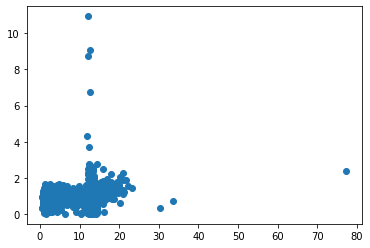

2137 2137
-0.10685241762570571 7.389744528058785e-07


In [4]:
plt.scatter(var_df_all.pl_rade, var_df_all.st_mass)
plt.show()

print(len(var_df_all.st_logg.dropna()), len(var_df_all.st_mass.dropna()[:-104]))

coef, _ = pearsonr(var_df_all.st_logg.dropna(), var_df_all.st_mass.dropna()[:-104])
print(coef, _)

## 4. Now lets graph each variable within the number of planets (Because our star number is constant during all the experiment = 1)

## **Divide the data into arrays (Per planet)**

In [5]:
mass_planet1_min = min(var_df.st_mass.dropna())
mass_planet1_max = max(var_df.st_mass.dropna())

mass_planet2_min = min(var_df2.st_mass)
mass_planet2_max = max(var_df2.st_mass)

mass_planet3_min = min(var_df3.st_mass)
mass_planet3_max = max(var_df3.st_mass)

mass_planet4_min = min(var_df4.st_mass)
mass_planet4_max = max(var_df4.st_mass)

mass_planet5_min = min(var_df5.st_mass)
mass_planet5_max = max(var_df5.st_mass)

mass_planet6_min = min(var_df6.st_mass)
mass_planet6_max = max(var_df6.st_mass)

mass_planet7_min = min(var_df7.st_mass)
mass_planet7_max = max(var_df7.st_mass)

mass_planet8_min = min(var_df8.st_mass)
mass_planet8_max = max(var_df8.st_mass)


0.4900913873452778
0.4900913873452778


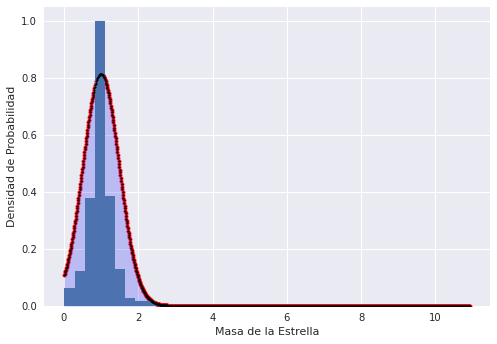

0.8139743794344437
0.99


In [20]:
# A custom function to calculate
# probability distribution function
def pdf(x, z):
    mean = np.mean(x)
    std = np.std(x)
    print(std)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (z - mean)**2 / (2 * std**2))
    return y_out

# To generate an array of x-values
x = np.arange(mass_planet1_min, mass_planet1_max, 0.01)
y = pdf(var_df.st_mass.dropna(), x)

# # To fill in values under the bell-curve
x_fill = np.arange(mass_planet1_min, mass_planet1_max, 0.01)
y_fill = pdf(var_df.st_mass.dropna(), x_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')

new_mass1 = []

counts, bins = np.histogram(var_df.st_mass.dropna(), bins=40)

for t in counts:
    new_elem = t / max(counts)
    new_mass1.append(new_elem)

plt.hist(bins[:-1], bins, weights=new_mass1)
plt.plot(x, y, '.', color = 'black', ms='4')
plt.scatter(x, y, marker = '.', color = 'red')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.fill_between(x_fill, y_fill, 0, alpha = 0.2, color = 'blue')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_1.png')
plt.show()

print(max(y))
print(x.tolist()[98])

0.441251849715742
0.441251849715742


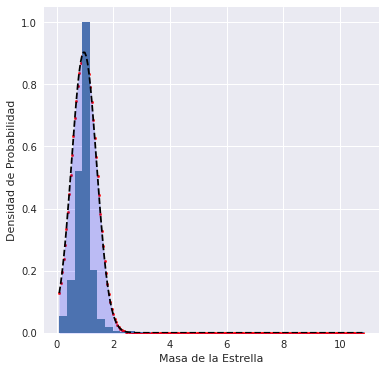

0.9029326568988034
0.9400000000000003


In [31]:
# To generate an array of x-values
x2 = np.arange(mass_planet2_min, mass_planet2_max, 0.05)
y2 = pdf(var_df2.st_mass.dropna(), x2)
  
# To fill in values under the bell-curve
x2_fill = np.arange(mass_planet2_min, mass_planet2_max, 0.05)
y2_fill = pdf(var_df2.st_mass.dropna(), x2_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass2 = []

counts2, bins2 = np.histogram(var_df2.st_mass.dropna(), bins=40)

for y in counts2:
    new_elem2 = y / max(counts2)
    new_mass2.append(new_elem2)

plt.hist(bins2[:-1], bins2, weights=new_mass2)
plt.plot(x2, y2, color = 'black', linestyle = 'dashed')
plt.scatter(x2, y2, marker = '.', s = 25, color = 'red')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.fill_between(x2_fill, y2_fill, 0, alpha = 0.2, color = 'blue')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_2.png')
plt.show()

print(max(y2))
print(x2.tolist()[17])

0.2605197738751427
0.2605197738751427


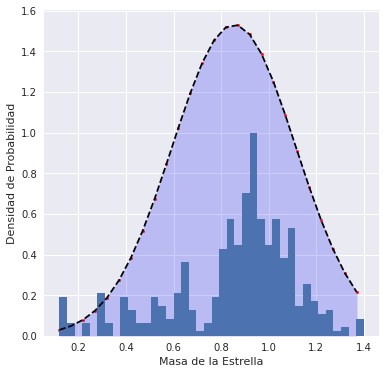

1.5284602876884434
0.8699999999999998


In [35]:
# To generate an array of x-values
x3 = np.arange(mass_planet3_min, mass_planet3_max, 0.05)
y3 = pdf(var_df3.st_mass.dropna(), x3)
  
# To fill in values under the bell-curve
x3_fill = np.arange(mass_planet3_min, mass_planet3_max, 0.05)
y3_fill = pdf(var_df3.st_mass.dropna(), x3_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass3 = []

counts3, bins3 = np.histogram(var_df3.st_mass.dropna(), bins=40)

for d in counts3:
    new_elem3 = d / max(counts3)
    new_mass3.append(new_elem3)

plt.hist(bins3[:-1], bins3, weights=new_mass3)
plt.plot(x3, y3, color = 'black', linestyle = 'dashed')
plt.scatter(x3, y3, marker = '.', s = 25, color = 'red')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.fill_between(x3_fill, y3_fill, 0, alpha = 0.2, color = 'blue')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_3.png')
plt.show()

print(max(y3))
print(x3.tolist()[15])

0.25385571483093705
0.25385571483093705


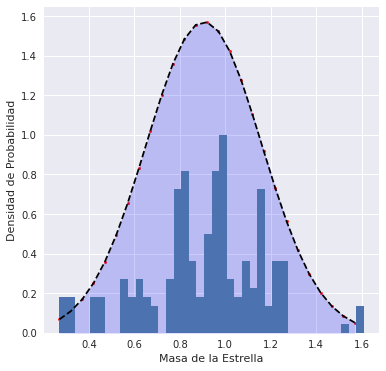

13
0.9199999999999999


In [37]:
# To generate an array of x-values
x4 = np.arange(mass_planet4_min, mass_planet4_max, 0.05)
y4 = pdf(var_df4.st_mass.dropna(), x4)
  
# To fill in values under the bell-curve
x4_fill = np.arange(mass_planet4_min, mass_planet4_max, 0.05)
y4_fill = pdf(var_df4.st_mass.dropna(), x4_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass4 = []

counts4, bins4 = np.histogram(var_df4.st_mass.dropna(), bins=40)

for u in counts4:
    new_elem4 = u / max(counts4)
    new_mass4.append(new_elem4)

plt.hist(bins4[:-1], bins4, weights=new_mass4)

plt.plot(x4, y4, color = 'black', linestyle = 'dashed')
plt.scatter(x4, y4, marker = '.', s = 25, color = 'red')
plt.fill_between(x4_fill, y4_fill, 0, alpha = 0.2, color = 'blue')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_4.png')
plt.show()


print(y4.tolist().index(max(y4)))
print(x4.tolist()[13])

0.20169959286466804
0.20169959286466804


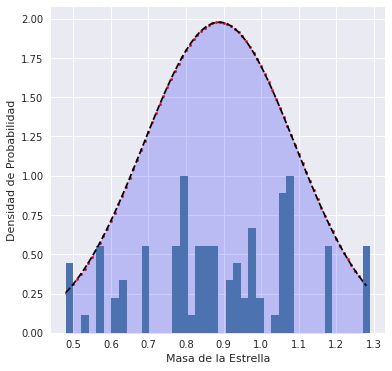

41
0.8900000000000003


In [39]:
# To generate an array of x-values
x5 = np.arange(mass_planet5_min, mass_planet5_max, 0.01)
y5 = pdf(var_df5.st_mass.dropna(), x5)
  
# To fill in values under the bell-curve
x5_fill = np.arange(mass_planet5_min, mass_planet5_max, 0.01)
y5_fill = pdf(var_df5.st_mass.dropna(), x5_fill)

new_mass5 = []

counts5, bins5 = np.histogram(var_df5.st_mass.dropna(), bins=40)

for n in counts5:
    new_elem5 = n / max(counts5)
    new_mass5.append(new_elem5)


# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

plt.hist(bins5[:-1], bins5, weights=new_mass5)
plt.plot(x5, y5, color = 'black', linestyle = 'dashed')
plt.scatter(x5, y5, marker = '.', s = 25, color = 'red')
plt.fill_between(x5_fill, y5_fill, 0, alpha = 0.2, color = 'blue')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_5.png')
plt.show()

print(y5.tolist().index(max(y5)))
print(x5.tolist()[41])

0.15157768190203216
0.15157768190203216


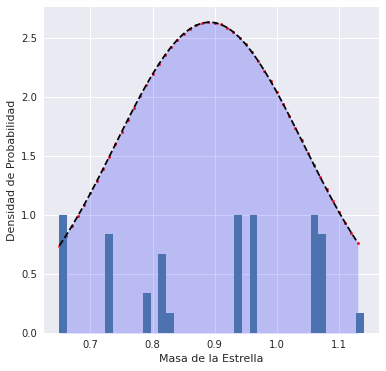

24
0.8900000000000002


In [44]:
# To generate an array of x-values
x6 = np.arange(mass_planet6_min, mass_planet6_max, 0.01)
y6 = pdf(var_df6.st_mass.dropna(), x6)
  
# To fill in values under the bell-curve
x6_fill = np.arange(mass_planet6_min, mass_planet6_max, 0.01)
y6_fill = pdf(var_df6.st_mass.dropna(), x6_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass6 = []

counts6, bins6 = np.histogram(var_df6.st_mass.dropna(), bins=40)

for l in counts6:
    new_elem6 = l / max(counts6)
    new_mass6.append(new_elem6)

plt.hist(bins6[:-1], bins6, weights=new_mass6)

plt.plot(x6, y6, color = 'black', linestyle = 'dashed')
plt.scatter(x6, y6, marker = '.', s = 25, color = 'red')
plt.fill_between(x6_fill, y6_fill, 0, alpha = 0.2, color = 'blue')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_6.png')
plt.show()

print(y6.tolist().index(max(y6)))
print(x6.tolist()[24])

0.003499271061118824
0.003499271061118824


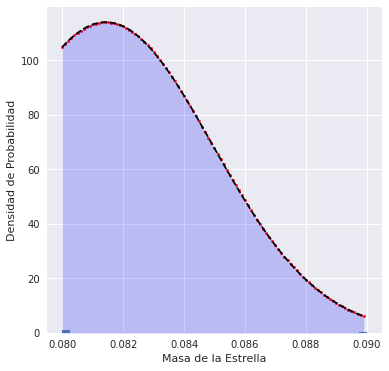

14
0.08140000000000004


In [46]:
# To generate an array of x-values
x7 = np.arange(mass_planet7_min, mass_planet7_max, 0.0001)
y7 = pdf(var_df7.st_mass.dropna(), x7)
  
# To fill in values under the bell-curve
x7_fill = np.arange(mass_planet7_min, mass_planet7_max, 0.0001)
y7_fill = pdf(var_df7.st_mass.dropna(), x7_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass7 = []

counts7, bins7 = np.histogram(var_df7.st_mass.dropna(), bins=40)

for v in counts7:
    new_elem7 = v / max(counts7)
    new_mass7.append(new_elem7)

plt.hist(bins7[:-1], bins7, weights=new_mass7)

plt.plot(x7, y7, color = 'black', linestyle = 'dashed')
plt.scatter(x7, y7, marker = '.', s = 25, color = 'red')
plt.fill_between(x7_fill, y7_fill, 0, alpha = 0.2, color = 'blue')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_7.png')
plt.show()

print(y7.tolist().index(max(y7)))
print(x7.tolist()[14])

0.026457513110645856
0.026457513110645856


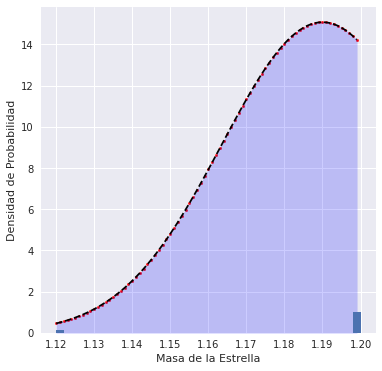

70
1.1899999999999924


In [49]:
# To generate an array of x-values
x8 = np.arange(mass_planet8_min, mass_planet8_max, 0.001)
y8 = pdf(var_df8.st_mass.dropna(), x8)
  
# To fill in values under the bell-curve
x8_fill = np.arange(mass_planet8_min, mass_planet8_max, 0.001)
y8_fill = pdf(var_df8.st_mass.dropna(), x8_fill)
  
# Plotting the bell-shaped curve
plt.style.use('seaborn')
plt.figure(figsize = (6, 6))

new_mass8 = []

counts8, bins8 = np.histogram(var_df8.st_mass.dropna(), bins=40)

for d in counts8:
    new_elem8 = d / max(counts8)
    new_mass8.append(new_elem8)

plt.hist(bins8[:-1], bins8, weights=new_mass8)

plt.plot(x8, y8, color = 'black', linestyle = 'dashed')
plt.scatter(x8, y8, marker = '.', s = 25, color = 'red')
plt.fill_between(x8_fill, y8_fill, 0, alpha = 0.2, color = 'blue')
plt.ylabel('Densidad de Probabilidad')
plt.xlabel('Masa de la Estrella')
plt.savefig('/root/ml_mate_exoplanet/Models/histograma_8.png')
plt.show()

print(y8.tolist().index(max(y8)))
print(x8.tolist()[70])

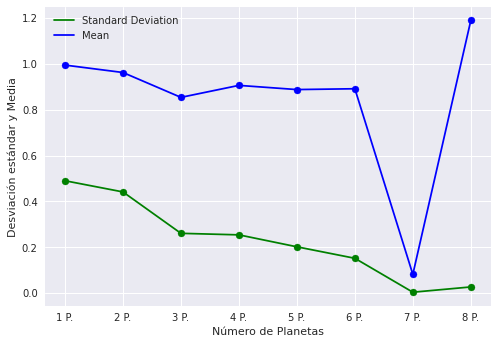

[0.4900913873452778, 0.441251849715742, 0.2605197738751427, 0.25385571483093705, 0.20169959286466807, 0.15157768190203216, 0.003499271061118824, 0.026457513110645856] [0.9949620705042391, 0.9625708061002178, 0.8540375586854461, 0.9063725490196078, 0.8881052631578947, 0.8916666666666667, 0.08142857142857143, 1.19]


In [14]:
standard_all = []
mean_all = []

ystandard_label = ['1 P.', '2 P.', '3 P.', '4 P.', '5 P.', '6 P.', '7 P.', '8 P.']

standard_all.append(statistics.pstdev(var_df.st_mass.dropna()))
standard_all.append(statistics.pstdev(var_df2.st_mass.dropna()))
standard_all.append(statistics.pstdev(var_df3.st_mass))
standard_all.append(statistics.pstdev(var_df4.st_mass))
standard_all.append(statistics.pstdev(var_df5.st_mass))
standard_all.append(statistics.pstdev(var_df6.st_mass))
standard_all.append(statistics.pstdev(var_df7.st_mass))
standard_all.append(statistics.pstdev(var_df8.st_mass))

mean_all.append(statistics.mean(var_df.st_mass.dropna()))
mean_all.append(statistics.mean(var_df2.st_mass.dropna()))
mean_all.append(statistics.mean(var_df3.st_mass))
mean_all.append(statistics.mean(var_df4.st_mass))
mean_all.append(statistics.mean(var_df5.st_mass))
mean_all.append(statistics.mean(var_df6.st_mass))
mean_all.append(statistics.mean(var_df7.st_mass))
mean_all.append(statistics.mean(var_df8.st_mass))

plt.plot(ystandard_label, standard_all, color='green', label='Standard Deviation')
plt.scatter(ystandard_label, standard_all, color='green')

plt.plot(ystandard_label, mean_all, color='blue', label='Mean')
plt.scatter(ystandard_label, mean_all, color='blue')

plt.ylabel('Desviación estándar y Media')
plt.xlabel('Número de Planetas')
plt.legend()
plt.show()

print(standard_all, mean_all)

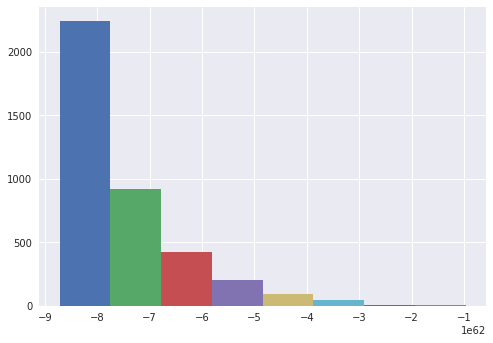

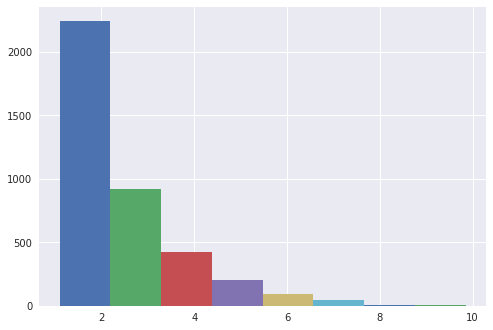

In [15]:
xt, _ = boxcox(np.array(var_df.st_mass))
xt2, _ = boxcox(np.array(var_df2.st_mass))
xt3, _ = boxcox(np.array(var_df3.st_mass))
xt4, _ = boxcox(np.array(var_df4.st_mass))
xt5, _ = boxcox(np.array(var_df5.st_mass))
xt6, _ = boxcox(np.array(var_df6.st_mass))
xt7, _ = boxcox(np.array(var_df7.st_mass))
xt8, _ = boxcox(np.array(var_df8.st_mass))

list_2 = [var_df.st_mass, var_df2.st_mass, var_df3.st_mass, var_df4.st_mass, var_df5.st_mass, var_df6.st_mass, var_df7.st_mass, var_df8.st_mass]
list_1 = [xt, xt2, xt3, xt4, xt5, xt6, xt7, xt8]
plt.hist(list_1, bins=1)
plt.show()

plt.hist(list_2, bins=1)
plt.show()

In [16]:
p_density = []

p_density.append(max(y))
p_density.append(max(y2))
p_density.append(max(y3))
p_density.append(max(y4))
p_density.append(max(y5))
p_density.append(max(y6))
p_density.append(max(y7))
p_density.append(max(y8))

print(p_density)

TypeError: 'numpy.int64' object is not iterable